In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

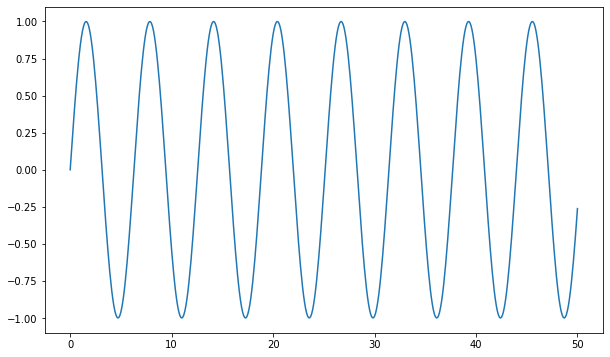

In [3]:
plt.figure(figsize= (10,6))
plt.plot(x,y)

In [4]:
df = pd.DataFrame(y,index=x,columns=['sine'])

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
test_size=100

In [8]:
locc = len(df) - 100

In [9]:
train= df.iloc[0:locc]
test = df.iloc[locc:]

In [10]:
scaler.fit(train)
strain = scaler.transform(train)
stest = scaler.transform (test)

In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

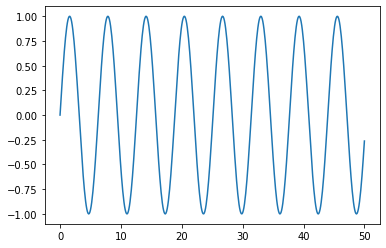

In [12]:
plt.plot(x,y)

In [13]:
length = 65
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [14]:
fullgenerator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length,batch_size=1)
#val_generator = TimeseriesGenerator(stest,stest ,length = length,batch_size=1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,SimpleRNN ,LSTM


In [16]:
model =Sequential()

model.add(LSTM(60, input_shape= (length,1)))

model.add(Dense(1))

model.compile(optimizer = 'adam' ,loss= 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60)                14880     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import EarlyStopping


In [18]:
model.fit(fullgenerator,epochs=5, verbose=2)

  ...
    to  
  ['...']
Train for 436 steps
Epoch 1/5
436/436 - 20s - loss: 0.0094
Epoch 2/5
436/436 - 17s - loss: 2.3707e-04
Epoch 3/5
436/436 - 17s - loss: 2.3635e-04
Epoch 4/5
436/436 - 17s - loss: 7.8342e-05
Epoch 5/5
436/436 - 17s - loss: 2.2212e-04


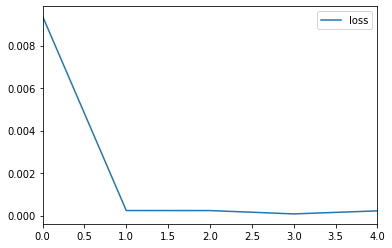

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
vv=model.predict(fullgenerator)

In [22]:
vvv = scaler.inverse_transform(vv)

In [23]:
len(vvv)

436

In [26]:
model.save('sinernn.h5')

from tensorflow.keras.models import load_model

In [27]:
mymodel= load_model('sinernn.h5')

In [43]:
predictions = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(300):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = mymodel.predict(current_batch)[0]
    
    # store prediction
    predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [44]:
forecast = scaler.inverse_transform(predictions)

In [45]:
len(forecast)
#forecast_index = np.arange(50.1,55.1,step=0.1)

300

In [34]:
df.tail()

,sine
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400
50.0,-0.262375


In [60]:
a=np.arange(50.1,80.1,0.1)
new= pd.DataFrame(forecast,index=a,columns=['sine'])

In [61]:
fulldf = pd.concat([df,new],axis=0,ignore_index = False)
fulldf


,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
79.6,-0.814520
79.7,-0.879467
79.8,-0.935596
79.9,-0.982359


<Figure size 288x432 with 0 Axes>

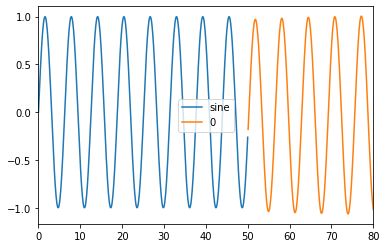

In [53]:
plt.figure(figsize=(4,6))
fulldf.plot()

,sine,0
0.0,0.000000,NaN
0.1,0.099833,NaN
0.2,0.198669,NaN
0.3,0.295520,NaN
0.4,0.389418,NaN
...,...,...
79.6,NaN,-0.814520
79.7,NaN,-0.879467
79.8,NaN,-0.935596
79.9,NaN,-0.982359
